In [48]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [49]:
import os
import pandas as pd

directory_path = "/Users/qingyangtian/Downloads"  # Replace with your actual path

input_file = os.path.join(directory_path, "fomc_input_data.csv")
output_file = os.path.join(directory_path, "fomc_output_data.csv")

# Read CSV files
df_input = pd.read_csv(input_file)
df_output = pd.read_csv(output_file)

In [50]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FOMC Date      171 non-null    object 
 1   0              171 non-null    float64
 2   1              171 non-null    float64
 3   2              171 non-null    float64
 4   3              171 non-null    float64
 5   4              171 non-null    float64
 6   5              171 non-null    float64
 7   6              171 non-null    float64
 8   7              171 non-null    float64
 9   8              171 non-null    float64
 10  9              171 non-null    float64
 11  10             171 non-null    float64
 12  11             171 non-null    float64
 13  12             171 non-null    float64
 14  13             171 non-null    float64
 15  14             171 non-null    float64
 16  15             171 non-null    float64
 17  16             171 non-null    float64
 18  17        

In [51]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FOMC Date        171 non-null    object 
 1   Difference(-1)   171 non-null    float64
 2   Difference(+1)   171 non-null    float64
 3   Difference(+5)   171 non-null    float64
 4   Difference(+20)  171 non-null    float64
 5   Difference(+30)  171 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.1+ KB


In [52]:
import pandas as pd

# Convert 'FOMC Date' to datetime format in both datasets
df_input["FOMC Date"] = pd.to_datetime(df_input["FOMC Date"])
df_output["FOMC Date"] = pd.to_datetime(df_output["FOMC Date"])

# Merge the datasets on 'FOMC Date'
df_merged = pd.merge(df_input, df_output, on="FOMC Date", how="inner") 

print(df_merged.head())


   FOMC Date         0         1         2         3         4         5  \
0 2004-01-28  6.327060 -1.126070 -0.252394  2.471113  1.827781  1.096356   
1 2004-03-16  6.755961  0.102110 -0.950192  0.941188  1.164726  0.429073   
2 2004-05-04  4.033997  0.610780  0.674800  2.748445  1.354559  0.728644   
3 2004-06-30  3.391017  0.782957  2.826380  1.342344 -1.341142  1.173793   
4 2004-08-10  2.799754 -0.030407  2.050081  1.868785 -1.213010  1.109189   

          6         7         8  ...  supportive  expansion  inflation  \
0 -1.018242  0.201056 -0.948956  ...         0.0   0.000000   0.865664   
1 -1.746843  0.732180 -0.336554  ...         0.0   0.000000   0.865664   
2 -1.566042 -0.011801  0.367770  ...         0.0   0.000000   0.865664   
3 -1.124810 -0.870607  2.057794  ...         0.0   0.000000   0.755389   
4 -0.747427 -0.428058  1.530366  ...         0.0   0.760123   0.490835   

   tightening  restrictive  Difference(-1)  Difference(+1)  Difference(+5)  \
0         0.0       

In [53]:
df_merged.describe()

,FOMC Date,0,1,2,3,4,5,6,7,8,...,supportive,expansion,inflation,tightening,restrictive,Difference(-1),Difference(+1),Difference(+5),Difference(+20),Difference(+30)
count,171,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2014-08-14 15:34:44.210526208,-6.549708e-08,2.159766e-07,1.577953e-07,2.973099e-08,3.989474e-08,-5.749731e-08,-2.428070e-08,-2.918129e-08,1.388047e-07,...,0.022963,0.050558,0.903124,0.029086,0.011776,1.386257,-1.066021,-1.435261,7.212807,7.800293
min,2004-01-28 00:00:00,-6.416564e+00,-5.104606e+00,-4.258562e+00,-5.528056e+00,-2.847795e+00,-3.760156e+00,-2.418440e+00,-2.462020e+00,-2.443380e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,-92.880005,-76.900024,-190.839966,-132.670044,-270.010010
25%,2009-05-27 00:00:00,-2.433081e+00,-1.083897e+00,-1.167577e+00,-9.569698e-01,-1.141390e+00,-6.167011e-01,-7.467389e-01,-7.299082e-01,-5.051357e-01,...,0.000000,0.000000,0.865664,0.000000,0.000000,-1.904999,-3.810005,-8.454987,-7.949997,-8.969986
50%,2014-09-17 00:00:00,-9.835747e-01,7.919486e-01,1.914581e-01,1.342932e-01,-2.188506e-02,1.290683e-02,-1.371427e-02,2.010559e-01,3.190133e-02,...,0.000000,0.000000,0.953677,0.000000,0.000000,0.809998,-0.169983,-0.070007,4.899963,7.130005
75%,2019-11-20 00:00:00,2.253966e+00,1.734230e+00,1.022325e+00,9.528329e-01,8.844698e-01,7.203572e-01,7.187631e-01,6.828644e-01,4.368930e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,4.585022,4.204987,5.954987,18.819992,22.020004
max,2024-12-18 00:00:00,8.078191e+00,3.176355e+00,3.541945e+00,3.269749e+00,3.809992e+00,3.451979e+00,2.340212e+00,1.854980e+00,2.344823e+00,...,0.718232,0.760123,1.000000,0.754395,0.441001,44.820068,61.669983,102.279907,174.250000,207.359985
std,NaN,3.199847e+00,2.304248e+00,1.659665e+00,1.558157e+00,1.335860e+00,1.056611e+00,9.553375e-01,9.337842e-01,8.314183e-01,...,0.122536,0.152572,0.160174,0.106728,0.068214,13.534215,15.396513,29.552336,41.927868,56.664177


In [54]:
# Your selected words have very low frequency, probably, they will not have an impact on your analysis
# I drop the rarest word in your colums
df_merged = df_merged.drop(columns=["restrictive"])

In [55]:
# Define a function to categorize difference values as 1 (Up) or 0 (Down)
def categorize_movement(value):
    return 1 if value > 0 else 0

# Apply the function to create new binary columns
df_merged["Target(+1)"] = df_merged["Difference(+1)"].apply(categorize_movement)
df_merged["Target(+5)"] = df_merged["Difference(+5)"].apply(categorize_movement)
df_merged["Target(+20)"] = df_merged["Difference(+20)"].apply(categorize_movement)
df_merged["Target(+30)"] = df_merged["Difference(+30)"].apply(categorize_movement)

# Display the updated dataframe
print(df_merged.head())

   FOMC Date         0         1         2         3         4         5  \
0 2004-01-28  6.327060 -1.126070 -0.252394  2.471113  1.827781  1.096356   
1 2004-03-16  6.755961  0.102110 -0.950192  0.941188  1.164726  0.429073   
2 2004-05-04  4.033997  0.610780  0.674800  2.748445  1.354559  0.728644   
3 2004-06-30  3.391017  0.782957  2.826380  1.342344 -1.341142  1.173793   
4 2004-08-10  2.799754 -0.030407  2.050081  1.868785 -1.213010  1.109189   

          6         7         8  ...  tightening  Difference(-1)  \
0 -1.018242  0.201056 -0.948956  ...         0.0       -5.910004   
1 -1.746843  0.732180 -0.336554  ...         0.0        0.909988   
2 -1.566042 -0.011801  0.367770  ...         0.0       -0.550003   
3 -1.124810 -0.870607  2.057794  ...         0.0        0.700012   
4 -0.747427 -0.428058  1.530366  ...         0.0        3.440002   

   Difference(+1)  Difference(+5)  Difference(+20)  Difference(+30)  \
0        2.139999       -1.050003         6.080002        -1.38

In [56]:
# Define features (X) and target variable (y)
X = df_merged.drop(columns=["Target(+1)", "Target(+5)","Target(+20)","Target(+30)", 
                            "Difference(-1)","Difference(+1)",  "Difference(+5)", "Difference(+20)", 
                            "Difference(+30)","FOMC Date"])  # Drop target and date columns
y = df_merged["Target(+1)"]  # Output variable, you can change it if you want to analyse other ones

In [57]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,29,Hawkish Score,Neutral Score,Dovish Score,easing,accommodative,supportive,expansion,inflation,tightening
0,6.327060,-1.126070,-0.252394,2.471113,1.827781,1.096356,-1.018242,0.201056,-0.948956,-1.799003,...,-0.131526,0.526008,0.202922,0.271070,0.0,0.500625,0.0,0.000000,0.865664,0.0
1,6.755961,0.102110,-0.950192,0.941188,1.164726,0.429073,-1.746843,0.732180,-0.336554,-2.013142,...,-0.084207,0.250720,0.294503,0.454777,0.0,0.500625,0.0,0.000000,0.865664,0.0
2,4.033997,0.610780,0.674800,2.748445,1.354559,0.728644,-1.566042,-0.011801,0.367770,-1.239381,...,0.095973,0.297351,0.070025,0.632623,0.0,0.500625,0.0,0.000000,0.865664,0.0
3,3.391017,0.782957,2.826380,1.342344,-1.341142,1.173793,-1.124810,-0.870607,2.057794,-0.258015,...,0.011734,0.209592,0.063020,0.727387,0.0,0.655277,0.0,0.000000,0.755389,0.0
4,2.799754,-0.030407,2.050081,1.868785,-1.213010,1.109189,-0.747427,-0.428058,1.530366,-0.883750,...,-0.068706,0.251640,0.049578,0.698782,0.0,0.425785,0.0,0.760123,0.490835,0.0


In [58]:
y

0      1
1      1
2      1
3      0
4      0
      ..
166    0
167    0
168    1
169    1
170    1
Name: Target(+1), Length: 171, dtype: int64

In [59]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit # we will try to predict the differnces for the last 20% of your dataset

In [60]:
# Let's explore what happens if we divide the dataset into folds by dates. 
# Define the number of splits (e.g., 5 folds)
n_splits = 5  
tscv = TimeSeriesSplit(n_splits=n_splits)

# Print splits
for train_index, test_index in tscv.split(X):
    print(f"Train indices: {train_index[:5]}... Test indices: {test_index[:5]}...")
    
    # Create train-test split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train indices: [0 1 2 3 4]... Test indices: [31 32 33 34 35]...
Train size: 31, Test size: 28
Train indices: [0 1 2 3 4]... Test indices: [59 60 61 62 63]...
Train size: 59, Test size: 28
Train indices: [0 1 2 3 4]... Test indices: [87 88 89 90 91]...
Train size: 87, Test size: 28
Train indices: [0 1 2 3 4]... Test indices: [115 116 117 118 119]...
Train size: 115, Test size: 28
Train indices: [0 1 2 3 4]... Test indices: [143 144 145 146 147]...
Train size: 143, Test size: 28


### Logistic Regression ( A linear Model)

In [62]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# Define Time Series Split
n_splits = 5  
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store results
accuracies = []
reports = []

# Train and test over each fold
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    reports.append(classification_report(y_test, y_pred, output_dict=True))

    print(f"Fold Accuracy: {acc:.4f}")

# Print average accuracy
print(f"\nAverage Accuracy over {n_splits} folds: {np.mean(accuracies):.4f}")


Fold Accuracy: 0.3929
Fold Accuracy: 0.4643
Fold Accuracy: 0.5000
Fold Accuracy: 0.5714
Fold Accuracy: 0.5000

Average Accuracy over 5 folds: 0.4857


#### Average accuracy is low, we can check:

1. miscalssifed cases 
2. confusion matrix 

In [64]:
import pandas as pd
import numpy as np

# Get the last fold's predictions
y_pred_last = model.predict(X_test)

# Find misclassified indices
misclassified_indices = np.where(y_pred_last != y_test)[0]

# Show misclassified cases
df_misclassified = df_merged.iloc[test_index].iloc[misclassified_indices]

# Display misclassified cases
print("Misclassified Cases:")
print(df_misclassified.head())  # Shows the first few misclassified rows


Misclassified Cases:
     FOMC Date         0         1         2         3         4         5  \
146 2021-12-15  1.857601  1.130502 -1.809318 -1.891133  3.568090  0.315722   
147 2022-01-26 -0.735348  1.070216 -0.191737 -1.270181  0.950777  1.018417   
148 2022-03-16 -3.192191  1.330823  1.681509 -1.090223  0.363322  1.487679   
149 2022-05-04 -1.119691  1.959512  0.350253 -1.578377  0.384325  1.429846   
151 2022-07-27 -1.951794  1.680569  1.626231 -1.544381  1.881155  2.087090   

            6         7         8  ...  tightening  Difference(-1)  \
146  0.986602  0.995451  1.614101  ...         0.0       22.250000   
147 -0.071479  0.701801  0.770867  ...         0.0       -4.550049   
148 -0.186016  0.234856 -0.511583  ...         0.0       44.780029   
149  0.690922  0.734055 -0.387247  ...         0.0       36.680054   
151  0.730233  0.345252 -0.569498  ...         0.0       44.820068   

     Difference(+1)  Difference(+5)  Difference(+20)  Difference(+30)  \
146      -35.410

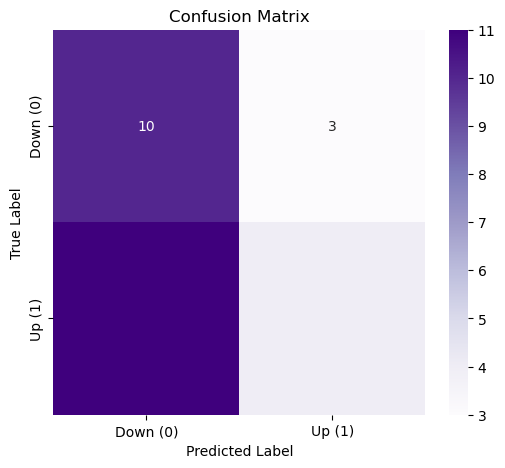

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the last fold
cm = confusion_matrix(y_test, y_pred_last)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Down (0)", "Up (1)"], yticklabels=["Down (0)", "Up (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, accuracy_score, precision_score, recall_score, f1_score
# Compute and display other evaluation metrics
accuracy = accuracy_score(y_test, y_pred_last)
precision = precision_score(y_test, y_pred_last, average='weighted')
recall = recall_score(y_test, y_pred_last, average='weighted')
f1 = f1_score(y_test, y_pred_last, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5
Precision: 0.5272108843537414
Recall: 0.5
F1 Score: 0.4679144385026738


#### This results can be due to non-linear nature of data. let's check probability distribution for test set. Logistic regression uses 0.5 to classify the cases into 0 and 1.

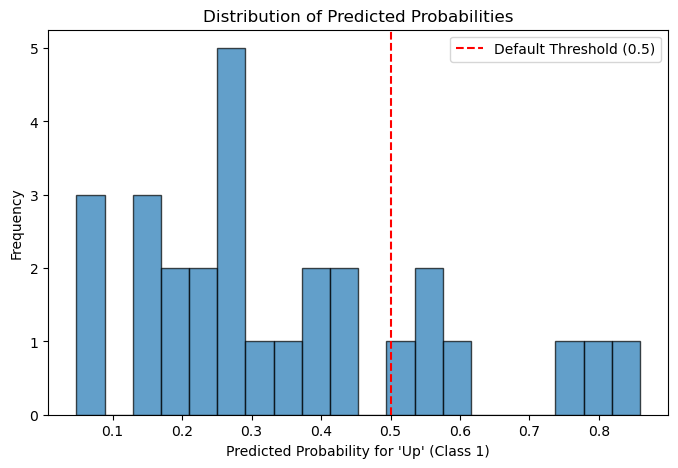

In [68]:
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (Up)
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Plot probability distribution
plt.figure(figsize=(8,5))
plt.hist(y_pred_probs, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(0.5, color='red', linestyle='dashed', label="Default Threshold (0.5)")
plt.xlabel("Predicted Probability for 'Up' (Class 1)")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()


#### Let's change threshold for logistic regression 

In [70]:
threshold = 0.3  # Looks like trheshold 0.3 is working better but linear model is not working well
y_pred_adjusted = (y_pred_probs >= threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.54      0.47      0.50        15

    accuracy                           0.50        28
   macro avg       0.50      0.50      0.50        28
weighted avg       0.51      0.50      0.50        28



In [71]:
# Compute and display other evaluation metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted, average='weighted')
recall = recall_score(y_test, y_pred_adjusted, average='weighted')
f1 = f1_score(y_test, y_pred_adjusted, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5
Precision: 0.5051282051282051
Recall: 0.5
F1 Score: 0.5


### Random Forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    "n_estimators": [10, 50],  # Number of trees
    "max_depth": [2, 7],  # Depth of each tree
    "min_samples_split": [5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [2, 4]  # Minimum samples at a leaf node
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use Time Series Split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform Grid Search
grid_search = GridSearchCV(
    rf_model, param_grid, cv=tscv, scoring="accuracy", n_jobs=-1, verbose=2
)
grid_search.fit(X, y)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model on the entire dataset
best_rf_model = grid_search.best_estimator_

# Get predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.97        15

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



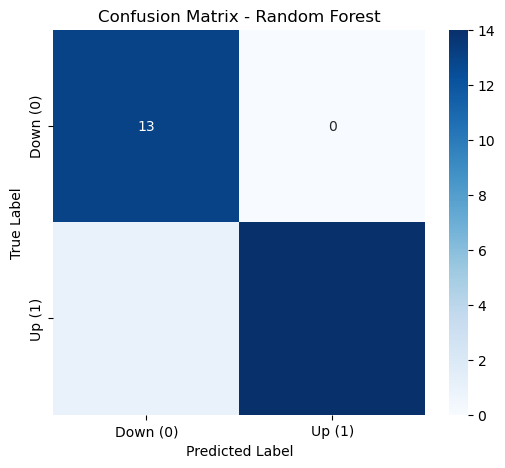

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.97        15

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the best model
y_pred = best_rf_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down (0)", "Up (1)"], yticklabels=["Down (0)", "Up (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


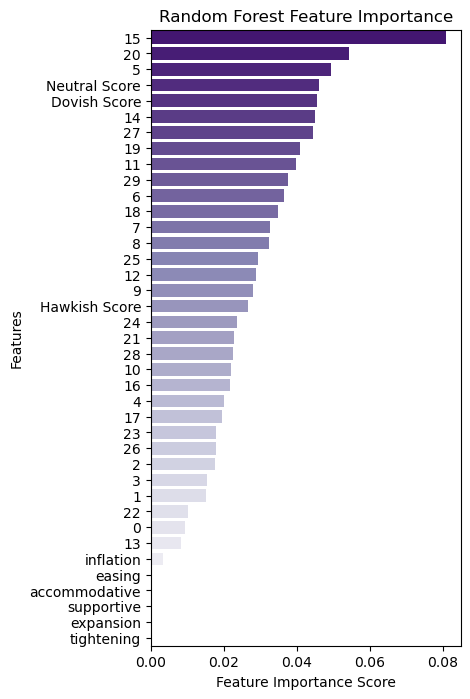

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from RF
feature_importance = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot 
plt.figure(figsize=(4, 8))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Purples_r")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


In [76]:
# Compute and display other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9642857142857143
Precision: 0.9668367346938774
Recall: 0.9642857142857143
F1 Score: 0.9643313264002921


# 1. Random forest even workign too well in this dataset, potential reason is small number of cases in test data, so I simplified the model in grid search   

# 2. As you see you selected words are not working well, becasue they are quite rare. 

# 3. XGBoost is a model even more complex than RF, so no need to run it. it will give perfect results. 